## Avances entrega proyecto final visión de máquina Primer avance
### Juan Daniel Sarmiento Abello CC 1000331954

El programa toma una pequeña muestra del set de datos para evaluar la eficiencia de los diferentes filtro que reducen el ruido speckle

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fft

from scipy import signal
from scipy.signal import convolve2d as conv2

from scipy.ndimage.filters import uniform_filter
from scipy.ndimage.measurements import variance
from pylab import *
from scipy.signal import convolve2d as conv2

C:\Users\Asus\AppData\Local\Temp\ipykernel_21204\1057828095.py:9: DeprecationWarning: Please use `uniform_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import uniform_filter
C:\Users\Asus\AppData\Local\Temp\ipykernel_21204\1057828095.py:10: DeprecationWarning: Please use `variance` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  from scipy.ndimage.measurements import variance


In [2]:
im1 = cv2.imread("subset_0_of_S1A_IW_GRDH_1SDV_20200722T104300_20200722T104329_033566_03E3CD_3098_Orb_Cal_TC_Sigma0_VH.png")
im2 = cv2.imread("subset_0_of_S1A_IW_GRDH_1SDV_20200722T104300_20200722T104329_033566_03E3CD_3098_Orb_Cal_TC_Sigma0_VV.png")
im3 = cv2.imread("subset_1_of_subset_0_of_S1A_IW_GRDH_1SDV_20200722T104300_20200722T104329_033566_03E3CD_3098_Orb_Cal_TC_Sigma0_VH.png")
im4 = cv2.imread("subset_1_of_subset_0_of_S1A_IW_GRDH_1SDV_20200722T104300_20200722T104329_033566_03E3CD_3098_Orb_Cal_TC_Sigma0_VV.png")
im5 = cv2.imread("subset_2_of_subset_0_of_S1A_IW_GRDH_1SDV_20200722T104300_20200722T104329_033566_03E3CD_3098_Orb_Cal_TC_Sigma0_VH.png")
im6 = cv2.imread("subset_2_of_subset_0_of_S1A_IW_GRDH_1SDV_20200722T104300_20200722T104329_033566_03E3CD_3098_Orb_Cal_TC_Sigma0_VV.png")
im7 = cv2.imread("subset_3_of_subset_0_of_S1A_IW_GRDH_1SDV_20200722T104300_20200722T104329_033566_03E3CD_3098_Orb_Cal_TC_Sigma0_VH.png")
im8 = cv2.imread("subset_3_of_subset_0_of_S1A_IW_GRDH_1SDV_20200722T104300_20200722T104329_033566_03E3CD_3098_Orb_Cal_TC_Sigma0_VV.png")
im9 = cv2.imread("subset_4_of_S1A_IW_GRDH_1SDV_20220314T104318_20220314T104343_042316_050B59_AFA7_Orb_Cal_TC_Sigma0_VH.png")
im10 = cv2.imread("subset_5_of_S1A_IW_GRDH_1SDV_20220314T104318_20220314T104343_042316_050B59_AFA7_Orb_Cal_TC_Sigma0_VV.png")
im11 = cv2.imread("subset_5_of_S1A_IW_GRDH_1SDV_20220314T104318_20220314T104343_042316_050B59_AFA7_Orb_Cal_TC_Sigma0_VH.png")
im12 = cv2.imread("subset_6_of_S1A_IW_GRDH_1SDV_20220314T104318_20220314T104343_042316_050B59_AFA7_Orb_Cal_TC_Sigma0_VV.png")
im13 = cv2.imread("subset_6_of_S1A_IW_GRDH_1SDV_20220314T104318_20220314T104343_042316_050B59_AFA7_Orb_Cal_TC_Sigma0_VH.png")
im14 = cv2.imread("subset_6_of_S1A_IW_GRDH_1SDV_20220314T104318_20220314T104343_042316_050B59_AFA7_Orb_Cal_TC_Sigma0_VV.png")
im15 = cv2.imread("subset_7_of_S1A_IW_GRDH_1SDV_20220314T104318_20220314T104343_042316_050B59_AFA7_Orb_Cal_TC_Sigma0_VH.png")
im16 = cv2.imread("subset_7_of_S1A_IW_GRDH_1SDV_20220314T104318_20220314T104343_042316_050B59_AFA7_Orb_Cal_TC_Sigma0_VV.png")

Img1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
Img2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
Img3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
Img4 = cv2.cvtColor(im4, cv2.COLOR_BGR2RGB)
Img5 = cv2.cvtColor(im5, cv2.COLOR_BGR2RGB)
Img6 = cv2.cvtColor(im6, cv2.COLOR_BGR2RGB)
Img7 = cv2.cvtColor(im7, cv2.COLOR_BGR2RGB)
Img8 = cv2.cvtColor(im8, cv2.COLOR_BGR2RGB)
Img9 = cv2.cvtColor(im9, cv2.COLOR_BGR2RGB)
Img10 = cv2.cvtColor(im10, cv2.COLOR_BGR2RGB)
Img11 = cv2.cvtColor(im11, cv2.COLOR_BGR2RGB)
Img12 = cv2.cvtColor(im12, cv2.COLOR_BGR2RGB)
Img13 = cv2.cvtColor(im13, cv2.COLOR_BGR2RGB)
Img14 = cv2.cvtColor(im14, cv2.COLOR_BGR2RGB)
Img15 = cv2.cvtColor(im15, cv2.COLOR_BGR2RGB)
Img16 = cv2.cvtColor(im16, cv2.COLOR_BGR2RGB)


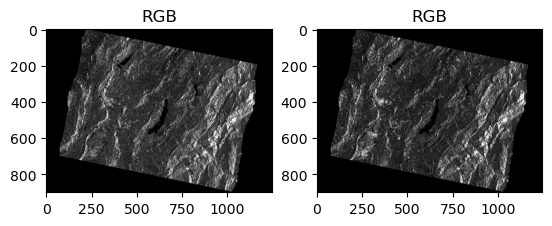

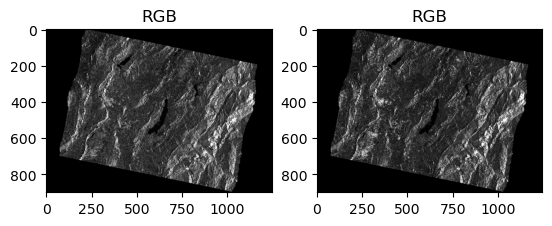

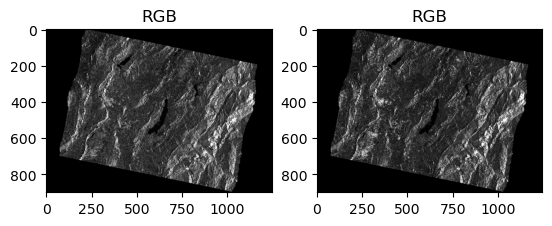

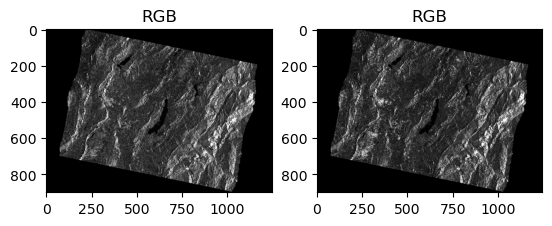

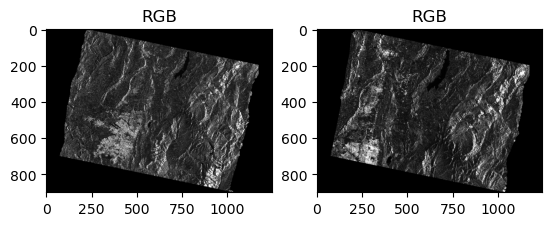

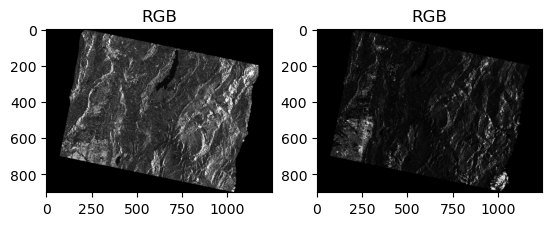

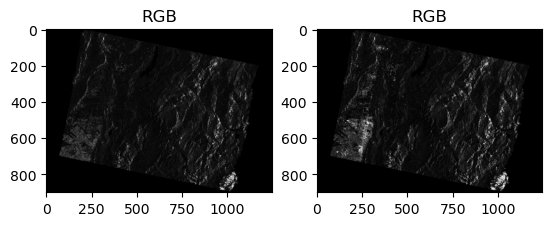

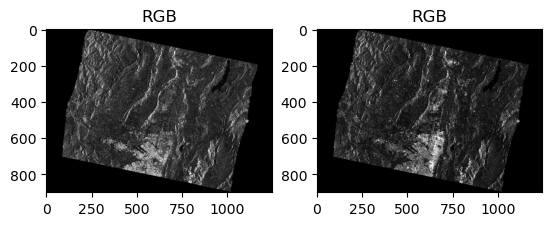

In [3]:
plt.figure()
plt.subplot(121)
plt.imshow(Img1,cmap='gray')
plt.title('RGB')
plt.subplot(122)
plt.imshow(Img2,cmap='gray')
plt.title('RGB')
plt.show()

plt.figure()
plt.subplot(121)
plt.imshow(Img3,cmap='gray')
plt.title('RGB')
plt.subplot(122)
plt.imshow(Img4,cmap='gray')
plt.title('RGB')
plt.show()

plt.figure()
plt.subplot(121)
plt.imshow(Img5,cmap='gray')
plt.title('RGB')
plt.subplot(122)
plt.imshow(Img6,cmap='gray')
plt.title('RGB')
plt.show()

plt.figure()
plt.subplot(121)
plt.imshow(Img7,cmap='gray')
plt.title('RGB')
plt.subplot(122)
plt.imshow(Img8,cmap='gray')
plt.title('RGB')
plt.show()

plt.figure()
plt.subplot(121)
plt.imshow(Img9,cmap='gray')
plt.title('RGB')
plt.subplot(122)
plt.imshow(Img10,cmap='gray')
plt.title('RGB')
plt.show()

plt.figure()
plt.subplot(121)
plt.imshow(Img11,cmap='gray')
plt.title('RGB')
plt.subplot(122)
plt.imshow(Img12,cmap='gray')
plt.title('RGB')
plt.show()

plt.figure()
plt.subplot(121)
plt.imshow(Img13,cmap='gray')
plt.title('RGB')
plt.subplot(122)
plt.imshow(Img14,cmap='gray')
plt.title('RGB')
plt.show()

plt.figure()
plt.subplot(121)
plt.imshow(Img15,cmap='gray')
plt.title('RGB')
plt.subplot(122)
plt.imshow(Img16,cmap='gray')
plt.title('RGB')
plt.show()

In [4]:
def lee_filter(img, size):
    img_mean = uniform_filter(img, (size, size))
    img_sqr_mean = uniform_filter(img**2, (size, size))
    img_variance = img_sqr_mean - img_mean**2

    overall_variance = variance(img)

    img_weights = img_variance**2 / (img_variance**2 + overall_variance**2)
    img_output = img_mean + img_weights * (img - img_mean)
    return img_output

def gamma_filter(matrix, gamma):
    # Apply gamma correction to each pixel in the matrix
    gamma_corrected_matrix = np.power(matrix, gamma)
    return gamma_corrected_matrix

In [5]:
LR1,LG1,LB1 = cv2.split(Img1)
LR2,LG2,LB2 = cv2.split(Img2)
LR3,LG3,LB3 = cv2.split(Img3)
LR4,LG4,LB4 = cv2.split(Img4)

LR5,LG5,LB5 = cv2.split(Img5)
LR6,LG6,LB6 = cv2.split(Img6)
LR7,LG7,LB7 = cv2.split(Img7)
LR8,LG8,LB8 = cv2.split(Img8)

LR9,LG9,LB9 = cv2.split(Img9)
LR10,LG10,LB10 = cv2.split(Img10)
LR11,LG11,LB11 = cv2.split(Img11)
LR12,LG12,LB12 = cv2.split(Img12)

LR13,LG13,LB13 = cv2.split(Img13)
LR14,LG14,LB14 = cv2.split(Img14)
LR15,LG15,LB15 = cv2.split(Img15)
LR16,LG16,LB16 = cv2.split(Img16)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


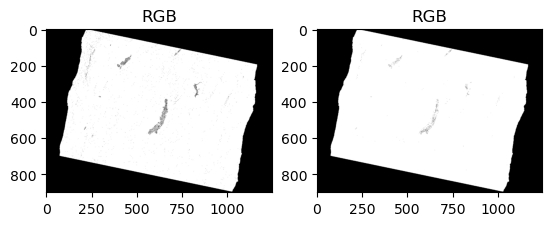

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


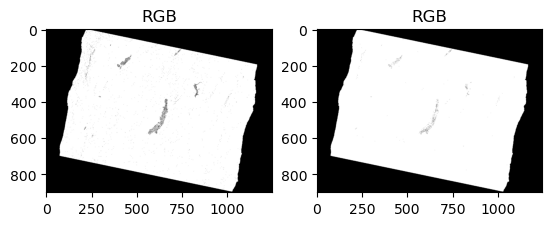

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


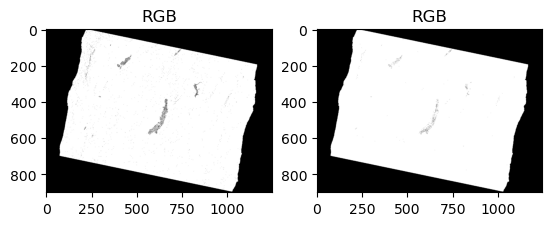

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


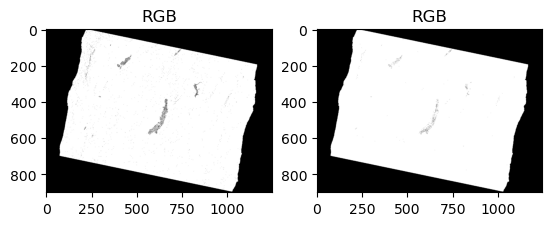

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


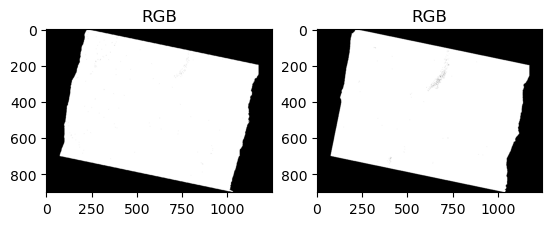

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


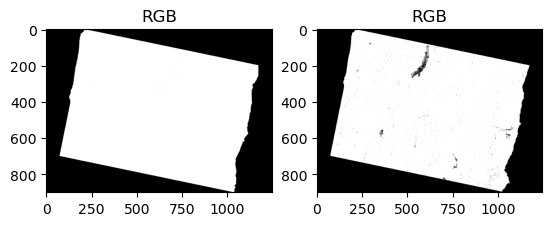

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


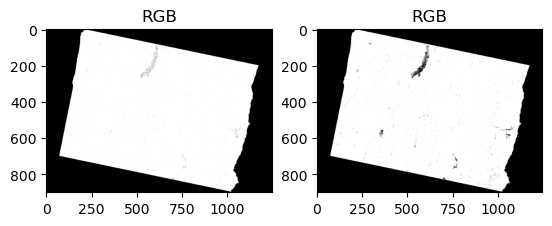

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


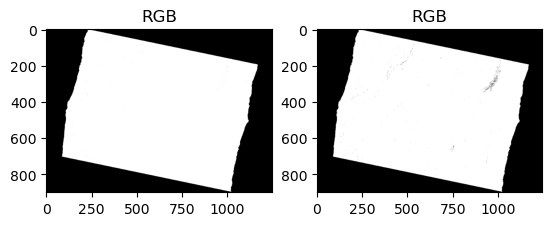

In [6]:
alfa = 5.6
Rl1 = gamma_filter(LR1,alfa)
Gl1 = gamma_filter(LG1,alfa)
Bl1 = gamma_filter(LB1,alfa)

Rl2 = gamma_filter(LR2,alfa)
Gl2 = gamma_filter(LG2,alfa)
Bl2 = gamma_filter(LB2,alfa)

Rl3 = gamma_filter(LR3,alfa)
Gl3 = gamma_filter(LG3,alfa)
Bl3 = gamma_filter(LB3,alfa)

Rl4 = gamma_filter(LR4,alfa)
Gl4 = gamma_filter(LG4,alfa)
Bl4 = gamma_filter(LB4,alfa)

Rl5 = gamma_filter(LR5,alfa)
Gl5 = gamma_filter(LG5,alfa)
Bl5 = gamma_filter(LB5,alfa)

Rl6 = gamma_filter(LR6,alfa)
Gl6 = gamma_filter(LG6,alfa)
Bl6 = gamma_filter(LB6,alfa)

Rl7 = gamma_filter(LR7,alfa)
Gl7 = gamma_filter(LG7,alfa)
Bl7 = gamma_filter(LB7,alfa)

Rl8 = gamma_filter(LR8,alfa)
Gl8 = gamma_filter(LG8,alfa)
Bl8 = gamma_filter(LB8,alfa)

Rl9 = gamma_filter(LR9,alfa)
Gl9 = gamma_filter(LG9,alfa)
Bl9 = gamma_filter(LB9,alfa)

Rl10 = gamma_filter(LR10,alfa)
Gl10 = gamma_filter(LG10,alfa)
Bl10 = gamma_filter(LB10,alfa)

Rl11 = gamma_filter(LR11,alfa)
Gl11 = gamma_filter(LG11,alfa)
Bl11 = gamma_filter(LB11,alfa)

Rl12 = gamma_filter(LR12,alfa)
Gl12 = gamma_filter(LG12,alfa)
Bl12 = gamma_filter(LB12,alfa)

Rl13 = gamma_filter(LR13,alfa)
Gl13 = gamma_filter(LG13,alfa)
Bl13 = gamma_filter(LB13,alfa)

Rl14 = gamma_filter(LR14,alfa)
Gl14 = gamma_filter(LG14,alfa)
Bl14 = gamma_filter(LB14,alfa)

Rl15 = gamma_filter(LR15,alfa)
Gl15 = gamma_filter(LG15,alfa)
Bl15 = gamma_filter(LB15,alfa)

Rl16 = gamma_filter(LR16,alfa)
Gl16 = gamma_filter(LG16,alfa)
Bl16 = gamma_filter(LB16,alfa)

gamma_Rec1 = cv2.merge((Rl1,Gl1,Bl1))
gamma_Rec2 = cv2.merge((Rl2,Gl2,Bl2))
gamma_Rec3 = cv2.merge((Rl3,Gl3,Bl3))
gamma_Rec4 = cv2.merge((Rl4,Gl4,Bl4))
gamma_Rec5 = cv2.merge((Rl5,Gl5,Bl5))
gamma_Rec6 = cv2.merge((Rl6,Gl6,Bl6))
gamma_Rec7 = cv2.merge((Rl7,Gl7,Bl7))
gamma_Rec8 = cv2.merge((Rl8,Gl8,Bl8))
gamma_Rec9 = cv2.merge((Rl9,Gl9,Bl9))
gamma_Rec10 = cv2.merge((Rl10,Gl10,Bl10))
gamma_Rec11 = cv2.merge((Rl11,Gl11,Bl11))
gamma_Rec12 = cv2.merge((Rl12,Gl12,Bl12))
gamma_Rec13 = cv2.merge((Rl13,Gl13,Bl13))
gamma_Rec14 = cv2.merge((Rl14,Gl14,Bl14))
gamma_Rec15 = cv2.merge((Rl15,Gl15,Bl15))
gamma_Rec16 = cv2.merge((Rl16,Gl16,Bl16))


plt.figure()
plt.subplot(121)
plt.imshow(gamma_Rec1,cmap='gray')
plt.title('RGB')
plt.subplot(122)
plt.imshow(gamma_Rec2,cmap='gray')
plt.title('RGB')
plt.show()

plt.figure()
plt.subplot(121)
plt.imshow(gamma_Rec3,cmap='gray')
plt.title('RGB')
plt.subplot(122)
plt.imshow(gamma_Rec4,cmap='gray')
plt.title('RGB')
plt.show()

plt.figure()
plt.subplot(121)
plt.imshow(gamma_Rec5,cmap='gray')
plt.title('RGB')
plt.subplot(122)
plt.imshow(gamma_Rec6,cmap='gray')
plt.title('RGB')
plt.show()

plt.figure()
plt.subplot(121)
plt.imshow(gamma_Rec7,cmap='gray')
plt.title('RGB')
plt.subplot(122)
plt.imshow(gamma_Rec8,cmap='gray')
plt.title('RGB')
plt.show()

plt.figure()
plt.subplot(121)
plt.imshow(gamma_Rec9,cmap='gray')
plt.title('RGB')
plt.subplot(122)
plt.imshow(gamma_Rec10,cmap='gray')
plt.title('RGB')
plt.show()

plt.figure()
plt.subplot(121)
plt.imshow(gamma_Rec11,cmap='gray')
plt.title('RGB')
plt.subplot(122)
plt.imshow(gamma_Rec12,cmap='gray')
plt.title('RGB')
plt.show()

plt.figure()
plt.subplot(121)
plt.imshow(gamma_Rec13,cmap='gray')
plt.title('RGB')
plt.subplot(122)
plt.imshow(gamma_Rec14,cmap='gray')
plt.title('RGB')
plt.show()

plt.figure()
plt.subplot(121)
plt.imshow(gamma_Rec15,cmap='gray')
plt.title('RGB')
plt.subplot(122)
plt.imshow(gamma_Rec16,cmap='gray')
plt.title('RGB')
plt.show()



In [ ]:
cv2.imshow('Filtro gamma 1',gamma_Rec1)
cv2.imshow('Filtro gamma 2',gamma_Rec2)
cv2.imshow('Filtro gamma 3',gamma_Rec3)
cv2.imshow('Filtro gamma 4',gamma_Rec4)
cv2.imshow('Filtro gamma 5',gamma_Rec5)
cv2.imshow('Filtro gamma 6',gamma_Rec6)
cv2.imshow('Filtro gamma 7',gamma_Rec7)
cv2.imshow('Filtro gamma 8',gamma_Rec8)
cv2.imshow('Filtro gamma 9',gamma_Rec9)
cv2.imshow('Filtro gamma 10',gamma_Rec10)
cv2.imshow('Filtro gamma 11',gamma_Rec11)
cv2.imshow('Filtro gamma 12',gamma_Rec12)
cv2.imshow('Filtro gamma 13',gamma_Rec13)
cv2.imshow('Filtro gamma 14',gamma_Rec14)
cv2.imshow('Filtro gamma 15',gamma_Rec15)
cv2.imshow('Filtro gamma 16',gamma_Rec16)

cv2.waitKey(0)
cv2.destroyAllWindows()